Final Project 2


* Student name: Reuben Hough
* Student pace: full time
* Scheduled project review date/time: 5/15/20
* Instructor name: Amber Yandow
* Blog post URL:


## Importing libraries

In [1]:
import sqlite3
import pandas as pd
from pandas.plotting import scatter_matrix
import pickle
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from glob import glob
import os
import seaborn as sns
import warnings
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, Normalizer, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_validate
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, make_scorer, auc, accuracy_score, roc_curve
from sklearn.svm import LinearSVC, SVR
from itertools import combinations
%matplotlib inline

# Editing Data

## Opening and reading data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


## Replacing null values

In [3]:
# Null values in The waterfront, view, and yr_renovated columns
# can be replaced with zero to match the rest
df.waterfront.replace(np.NaN, 0.0, inplace=True)
df.view.replace(np.NaN, 0.0, inplace=True)
df.yr_renovated.replace(np.NaN, 0.0, inplace=True)
# Checking if there are any null values
df.isnull().values.any()

False

## Replacing basement values

There are question marks in the data, so it can all be replaced by subtracting the "above" square footage from total


In [55]:
df.sqft_basement = (df.sqft_living - df.sqft_above)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 26 columns):
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null int64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null int64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
Year             21596 non-null int64
Month            21596 non-null int64
Day              21596 non-null int64
Julian           21596 non-null float64
S

In [5]:
# Running function for sqft_basement column
df.sqft_basement = thisfunc(df.sqft_basement)

In [6]:
# Checking for other symbols that might be in the data
df.isin(['?','/',"'",'.','.']).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.view = df.view.apply(lambda x: int(x))

## Editing the date

In [8]:
# Making the Sale Date more useable
df['Year'] = df['date'].map(lambda x: '{}'.format(x[-4:].replace('/', '')))
df['Month'] = df['date'].map(lambda x: '{}'.format(x[:2].replace('/', '')))
df['Day'] = df['date'].map(lambda x: '{}'.format(x[-7:-5].replace('/', '')))
df['Day'] = df['Day'].map(lambda x: int(x))
df['Month'] = df['Month'].map(lambda x: int(x))
df['Year'] = df['Year'].map(lambda x: int(x))

In [9]:
# Making a function that turns the new date columns into a julian date
def julian(a,b,c):
    w=[]
    for x,y,z in zip(a,b,c):
         w.append(pd.Timestamp(year = x,  month = y, day = z).to_julian_date())
    return w

In [10]:
# Turning the date into a Julian date to make it more useable
df['Julian'] = julian(df['Year'], df['Month'], df['Day'])
df.sort_values(by='Julian')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Day,Julian
7316,2202500290,5/2/2014,435000.0,4,1.00,1450,8800,1.0,0.0,0,...,0.0,98006,47.5746,-122.135,1260,8942,2014,5,2,2456779.5
20586,7853361370,5/2/2014,555000.0,4,2.50,3310,6500,2.0,0.0,0,...,0.0,98065,47.5150,-121.870,2380,5000,2014,5,2,2456779.5
1040,7197300105,5/2/2014,550000.0,4,2.50,1940,10500,1.0,0.0,0,...,0.0,98052,47.6830,-122.114,2200,10500,2014,5,2,2456779.5
20543,3438501320,5/2/2014,295000.0,2,2.50,1630,1368,2.0,0.0,0,...,0.0,98106,47.5489,-122.363,1590,2306,2014,5,2,2456779.5
9587,472000620,5/2/2014,790000.0,3,2.50,2600,4750,1.0,0.0,0,...,0.0,98117,47.6833,-122.400,2380,4750,2014,5,2,2456779.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,5/14/2015,725000.0,4,1.75,1980,5850,1.0,0.0,1,...,0.0,98116,47.5607,-122.391,1810,5850,2015,5,14,2457156.5
12623,4166600610,5/14/2015,335000.0,3,2.00,1410,44866,1.0,0.0,0,...,0.0,98023,47.3273,-122.370,2950,29152,2015,5,14,2457156.5
5632,7923600250,5/15/2015,450000.0,5,2.00,1870,7344,1.5,0.0,0,...,0.0,98007,47.5951,-122.144,1870,7650,2015,5,15,2457157.5
13040,5101400871,5/24/2015,445500.0,2,1.75,1390,6670,1.0,0.0,0,...,0.0,98115,47.6914,-122.308,920,6380,2015,5,24,2457166.5


Looking at the data for any obvious errors

In [11]:
print(df.describe())
print(df.info())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944    

33 bedrooms is almost certainly an error based on the square footage; it's probably meant to be 3, but I'm uncertain so it will be dropped

In [12]:
df = df.drop([15856])

## Dropping columns that won't be used - id, date

In [13]:
df.drop(['id', 'date'], axis=1, inplace=True)

In [14]:
df.head().sort_values(by='Julian')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Day,Julian
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,0.0,98178,47.5112,-122.257,1340,5650,2014,10,13,2456943.5
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,2457000.5
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,0.0,98136,47.5208,-122.393,1360,5000,2014,12,9,2457000.5
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,0.0,98074,47.6168,-122.045,1800,7503,2015,2,18,2457071.5
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,0.0,98028,47.7379,-122.233,2720,8062,2015,2,25,2457078.5


# Creating Data

## Making a new catergory "Seattle" That contains all zip codes within the greater Seattle area

In [15]:
# list found on seattlearea.com/zip-codes/
seattle = [98003, 98005, 98033, 98037, 98040, 98052, 98055, 98101, 98101, 98102,
            98103, 98103, 98103, 98104, 98104, 98105, 98105, 98107, 98109,
            98109, 98110, 98110, 98116, 98116, 98118, 98121, 98125, 98144, 98199]

In [16]:
# Creating category with a 1 if in Seattle and 0 if not
df['Seattle'] = df['zipcode'].apply(lambda x: 1 if x in seattle else 0)

## Making column "Basement" for all homes with a basement

In [17]:
df['Basement'] = df['sqft_basement'].astype(bool).astype(int)

Making a new dataframe called new_df because the old one with few columns is more managable if I need it

## Creating columns for views

In [19]:
new_df = pd.concat([new_df,pd.get_dummies
                (new_df['view'], prefix='views',
                 drop_first=True)],axis=1)

## Creating columns for condition

In [20]:
new_df = pd.concat([new_df,pd.get_dummies
                (new_df['condition'], prefix='con',
                 drop_first=True)],axis=1)

## Creating columns for grade

In [21]:
new_df = pd.concat([new_df,pd.get_dummies
                (new_df['grade'], prefix='grade',
                 drop_first=True)],axis=1)

## Creating columns for zipcode

In [23]:
new_df = pd.concat([new_df,pd.get_dummies
                (new_df['zipcode'], prefix='zip',
                 drop_first=True)],axis=1)

In [24]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


## Transforming Data

Taking the log of the price makes the data more normalized

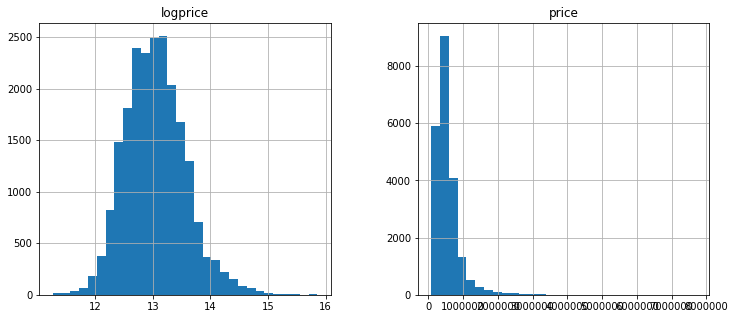

In [25]:
df['logprice'] = np.log(df['price'])
df[['logprice', 'price']].hist(figsize=(12,5),bins=30);

In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,Year,Month,Day,Julian,Seattle,Basement,logprice
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,-122.257,1340,5650,2014,10,13,2456943.5,0,0,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,-122.319,1690,7639,2014,12,9,2457000.5,1,1,13.195614
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,-122.233,2720,8062,2015,2,25,2457078.5,0,0,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,-122.393,1360,5000,2014,12,9,2457000.5,0,1,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,-122.045,1800,7503,2015,2,18,2457071.5,0,0,13.142166


# Asking Questions

## Finding correlation between price and having a basement, and price and living in Seattle

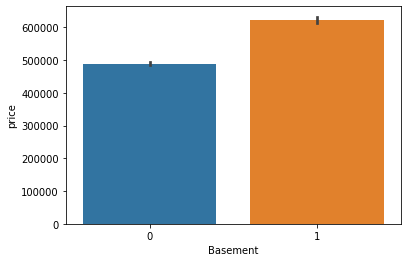

In [27]:
sns.barplot(x='Basement', y='price', data=df)

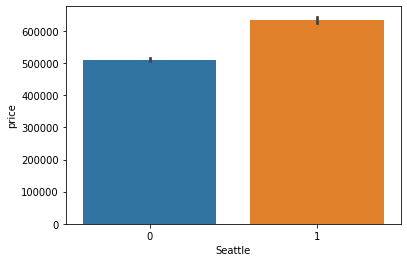

In [28]:
sns.barplot(x='Seattle', y='price', data=df)

## Plotting price in Relation to several factors

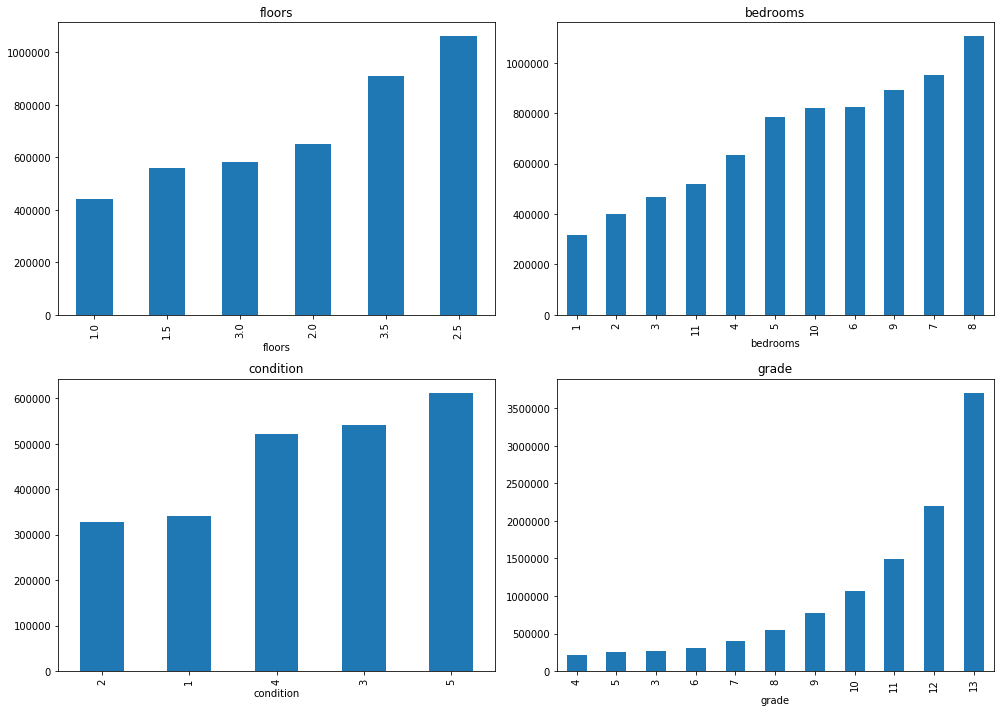

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
variables = ['floors', 'bedrooms', 'condition', 'grade']

for column, ax in zip(variables, axes.flatten()):
    (df.groupby(column).mean()['price'].sort_values().plot.bar(ax=ax))                
    
    ax.set_title(column)
    
fig.tight_layout()

## Performing OLS regression diagnostic

In [30]:
outcome = 'price'
cols = ['grade', 'sqft_lot', 'bathrooms', 'sqft_living', 'Seattle', 'Basement']
predictors = '+'.join(cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     4649.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        11:55:36   Log-Likelihood:            -2.9842e+05
No. Observations:               21596   AIC:                         5.969e+05
Df Residuals:                   21589   BIC:                         5.969e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.394e+05   1.32e+04    -48.483      0.000   -6.65e+05   -6.14e+05
grade        1.045e+05   2268.464     46.057      0.000       1e+05    1.09e+05
sqft_lot       -0.1079      0.041     -2.642      0.008      -0.188      -0.028
bathrooms   -4.185e+04   3364.724    -12.438      0.000   -4.84e+04   -3.53e+04
sqft_living   203.6315      3.358     60.643      0.000     197.050     210.213
Seattle       1.24e+05   3921.515     31.612      0.000    1.16e+05    1.32e+05
Basement     4.195e+04   3556.623     11.795      0.000     3.5e+04    4.89e+04
==============================================================================
Omnibus:                    17769.665   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1217839.300
Skew:                           3.512   Prob(JB):                         0.00
Kurtosis:                      39.112   Cond. No.                     3.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

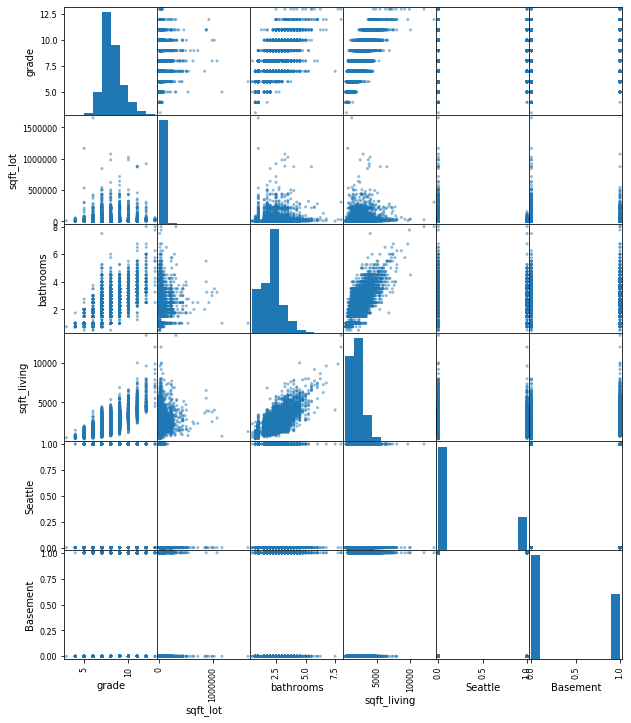

In [31]:
pd.plotting.scatter_matrix(df[cols], figsize=(10,12));

In [32]:
# Checking if there is significant correlation between any columns
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,Year,Month,Day,Julian,Seattle,Basement,logprice
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Square footage seems to be correlated with more than one other feature such as bathrooms and grade

## Creating heatmap

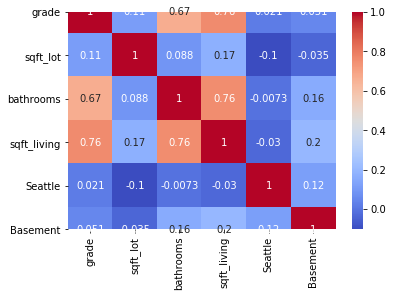

In [33]:
sns.heatmap(df[cols].corr(), cmap='coolwarm', annot=True);

## Creating a function to examine a histogram and Q-Q plot

In [34]:
def diagnostic_plot(df, var):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[var].hist(bins=30)
    plt.title(var)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(var)
    plt.tight_layout()
    plt.show()

## Plotting Columns

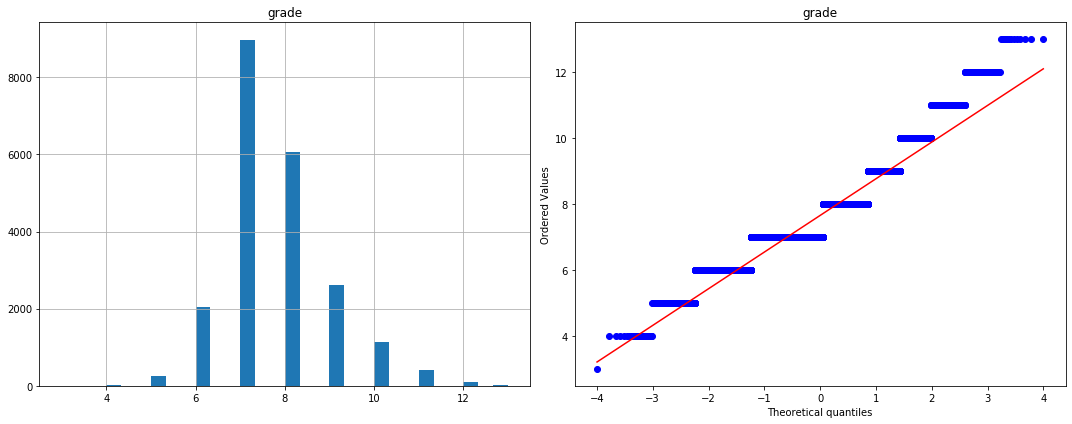

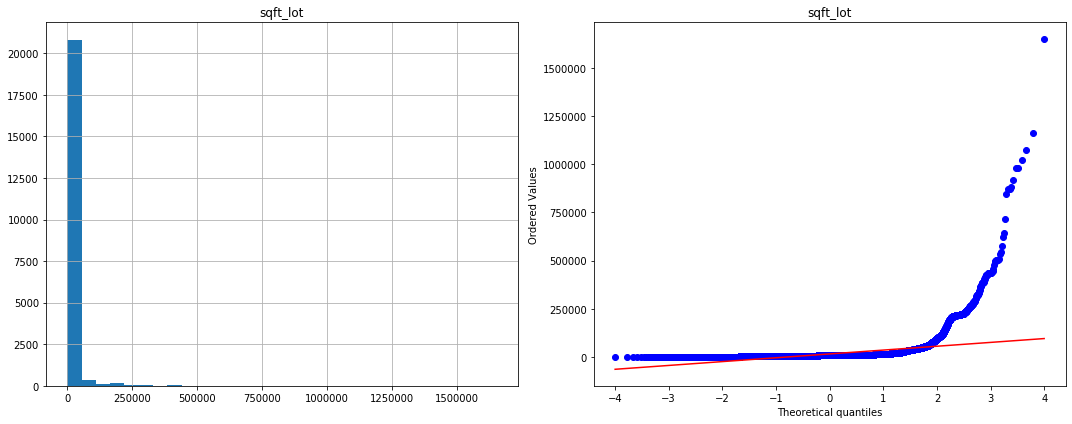

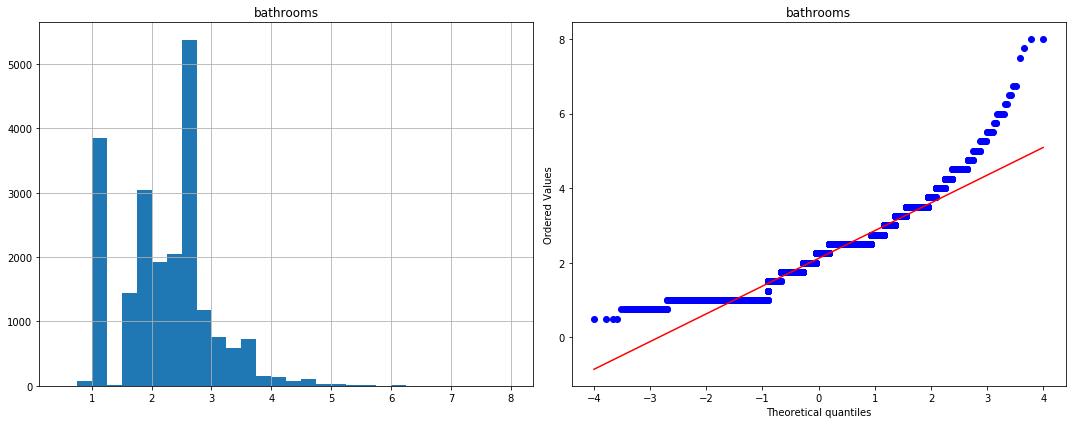

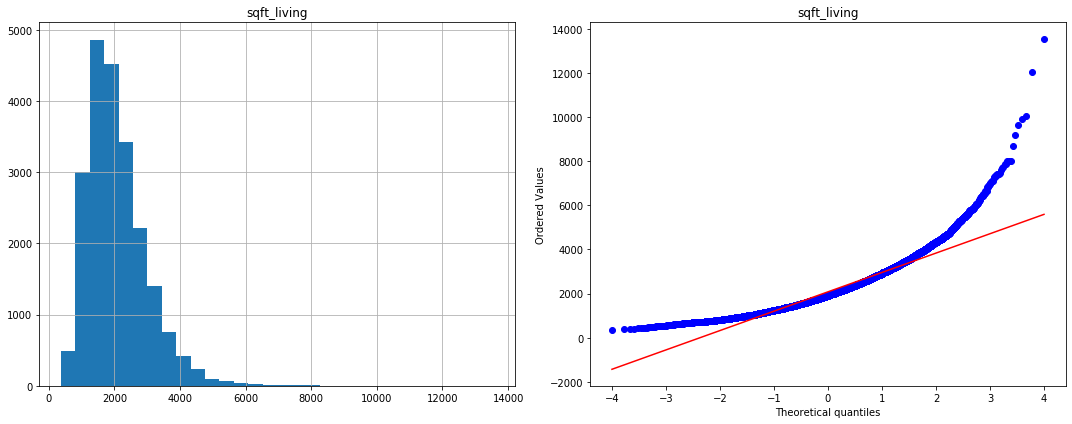

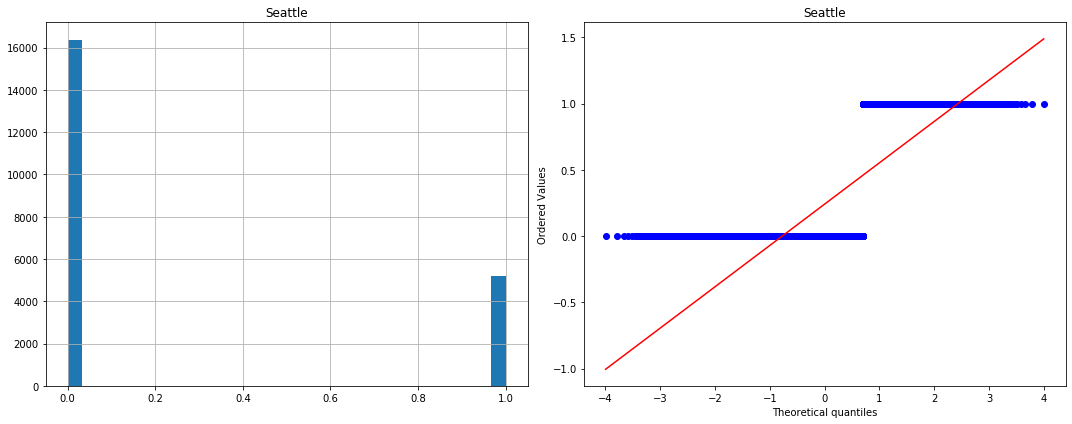

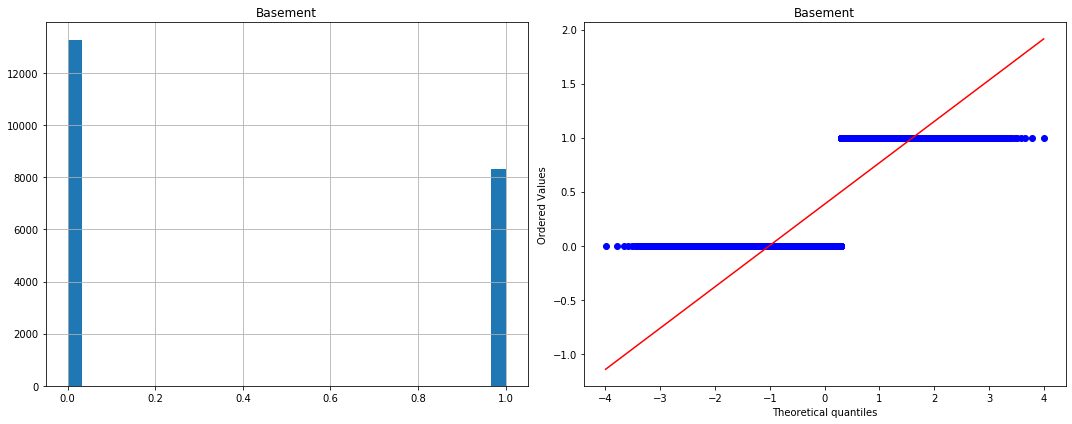

In [35]:
for col in df[cols]:
    diagnostic_plot(df,col)

## Train test split

In [36]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_fit = sm.OLS(y_train, x_train).fit()
results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()

C:\Users\reube\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3508.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        11:55:53   Log-Likelihood:            -2.3050e+05
No. Observations:               17276   AIC:                         4.610e+05
Df Residuals:                   17250   BIC:                         4.613e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.558e+08   3.14e+09      0.272      0.785    -5.3e+09    7.01e+09
bedrooms      -3.347e+04   1659.277    -20.173      0.000   -3.67e+04   -3.02e+04
bathrooms      9494.4173   2773.255      3.424      0.001    4058.556    1.49e+04
sqft_living      19.7336     14.703      1.342      0.180      -9.086      48.553
sqft_lot         -0.1743      0.041     -4.278      0.000      -0.254      -0.094
floors        -3.674e+04   3041.226    -12.082      0.000   -4.27e+04   -3.08e+04
waterfront     3.883e+05    1.5e+04     25.917      0.000    3.59e+05    4.18e+05
view           1.793e+04   1787.305     10.030      0.000    1.44e+04    2.14e+04
condition     -9248.1339   2001.153     -4.621      0.000   -1.32e+04   -5325.671
grade          1.037e+04   1955.860      5.302      0.000    6536.166    1.42e+04
sqft_above       85.4697     14.670      5.826      0.000      56.715     114.224
sqft_basement   101.2341     15.241      6.642      0.000      71.360     131.108
yr_built       -804.5010     62.170    -12.940      0.000    -926.361    -682.641
yr_renovated     -0.4608      3.300     -0.140      0.889      -6.928       6.007
zipcode        -230.6791     28.053     -8.223      0.000    -285.666    -175.692
lat           -1.535e+05    1.1e+04    -13.909      0.000   -1.75e+05   -1.32e+05
long          -1.517e+05   1.12e+04    -13.592      0.000   -1.74e+05    -1.3e+05
sqft_living15   -32.2111      2.907    -11.081      0.000     -37.909     -26.514
sqft_lot15       -0.2247      0.060     -3.738      0.000      -0.342      -0.107
Year           1.899e+05   6.67e+05      0.285      0.776   -1.12e+06     1.5e+06
Month          1.579e+04   5.57e+04      0.283      0.777   -9.34e+04    1.25e+05
Day             378.2871   1830.858      0.207      0.836   -3210.380    3966.954
Julian         -501.4933   1825.299     -0.275      0.784   -4079.264    3076.277
Seattle       -3905.3945   2919.799     -1.338      0.181   -9628.498    1817.709
Basement      -5.707e+04   4485.846    -12.723      0.000   -6.59e+04   -4.83e+04
logprice       5.472e+05   4646.752    117.767      0.000    5.38e+05    5.56e+05
==============================================================================
Omnibus:                    23799.212   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16319271.519
Skew:                           7.630   Prob(JB):                         0.00
Kurtosis:                     152.793   Cond. No.                     6.73e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+12. This might indicate that there are
strong multicollinearity or other numerical prob

In [37]:
len(X_train)

17276

In [38]:
predictions = model_fit.predict(X_test)
model_fit.conf_int()

,0,1
const,-5.300067e+09,7.011656e+09
bedrooms,-3.672442e+04,-3.021972e+04
bathrooms,4.058556e+03,1.493028e+04
sqft_living,-9.085579e+00,4.855281e+01
sqft_lot,-2.541429e-01,-9.444265e-02
floors,-4.270369e+04,-3.078147e+04
waterfront,3.589444e+05,4.176797e+05
view,1.442275e+04,2.142935e+04
condition,-1.317060e+04,-5.325671e+03
grade,6.536166e+03,1.420353e+04


Text(0, 0.5, 'Predicted Price')

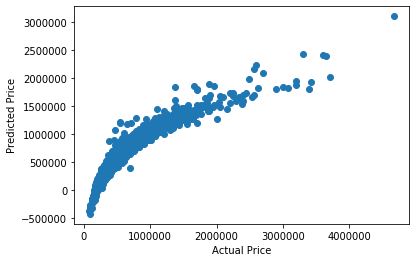

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

## Looking for correlations

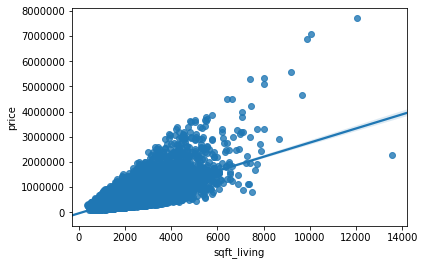

In [40]:
sns.regplot(x=df['sqft_living'],y=y,data=df);

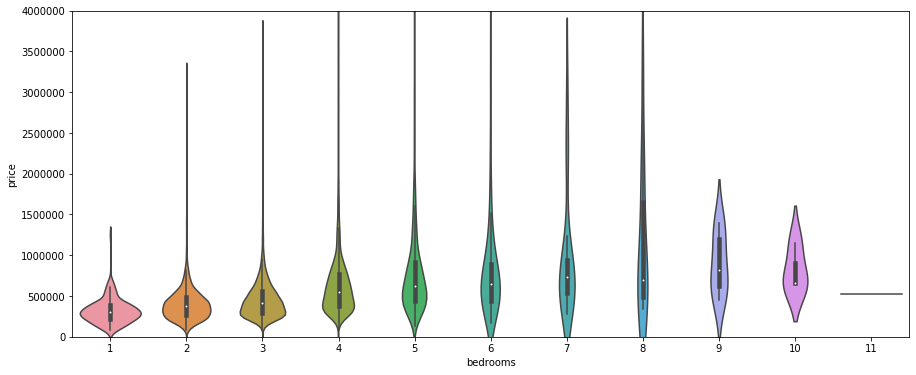

In [41]:
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.violinplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=4000000);

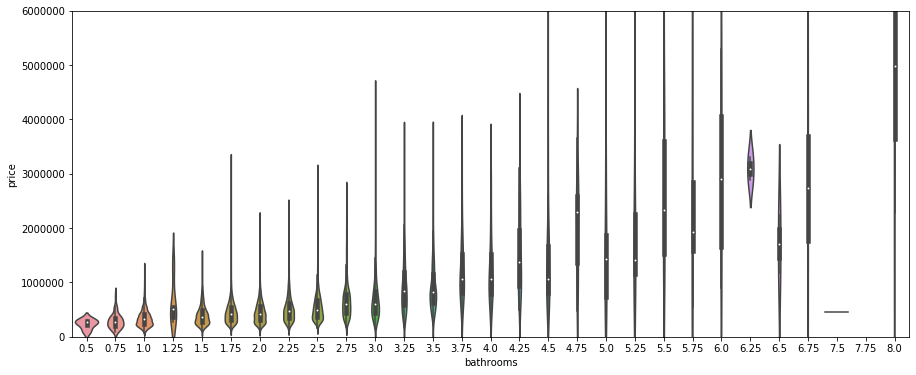

In [42]:
var = 'bathrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.violinplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=6000000);

## Creating a Linear Regression Function

In [43]:
# Making a function that normalizes a set of data
def normalize(x):
    return (x - x.mean()) / x.std()

In [44]:
# Making a regression line function that will be used from now on
def slope(x, y):
# Function that calculates slope
    m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) / ((np.mean(x)**2) - np.mean(x**2)))
    return m

In [45]:
# Defining a function that calculates and returns the slope and intercept, m and b in the formula y = mx + b
def best_fit(x, y):
    m = slope(x, y)
    b = np.mean(y) - m*np.mean(x)

In [46]:
# This function takes the slope and intercept, and calculates mx + b for each x
def reg_line (m, b, X):
    return [(m*x)+b for x in X]

In [47]:
# This function calculates the sum of squared errors between regression and mean line 
def sum_sq_err(x, y):
    z =  sum((y - x) * (y - x))
    return z

In [48]:
# This function calculates the r^2, which is how much the dependent variable (price) is affected by the independent variable
def r_squared(yreal, ypredicted):
    mean = [np.mean(yreal) for y in yreal]
    # Squared error
    SSreg = sum_sq_err(yreal, ypredicted)
    SSTotal = sum_sq_err(yreal, mean)
    # Calculates r-squared 
    rsq =  1 - (sq_err_reg/sq_err_y_mean)
    return rsq

In [49]:
# Plots data and a regression line
def plot_regression(X, Y, Y_pred):
    plt.scatter(X, Y, color='#BAEBAE', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.show()

In [50]:
# Diagnostic information for the current plot
def plot_info():
    print ('Regression Diagnostics')
    print ('----------------------------')
    print ('Slope:', m)
    print ('Y-Intercept:', b)
    print ('R-Squared:', r_squared)
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(b, 2))

In [51]:
X = df.Julian
Y = df.price

In [52]:
m, b = best_fit(X,Y)
Y_pred = reg_line(m,b,X)
plot_regression(X, Y, Y_pred)

TypeError: 'NoneType' object is not iterable

## Multiple linear regression